In [1]:
import tensorflow as tf
from tensorflow import keras
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import tensorflow.compat.v2.feature_column as fc



2023-08-14 17:31:25.448046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/yakupcanergen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
x=tf.constant(2)
y=tf.constant(3)

In [17]:
tf.print(tf.add(x,y))

5


In [39]:
a=tf.Variable([32.4,45.6,34.7],tf.float32)
tf.print(a)

[32.4 45.6 34.7]


In [41]:
tf.print(tf.rank(x))

0


In [45]:
tensor1=tf.ones([1,2,3])
tensor2=tf.reshape(tensor1,[3,2,1])
tensor3=tf.reshape(tensor1,[3,2])
tensor4=tf.reshape(tensor1,[1,-1])
print(tensor4)

tf.Tensor([[1. 1. 1. 1. 1. 1.]], shape=(1, 6), dtype=float32)


In [56]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [72]:
data=sns.load_dataset("titanic")

In [73]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [76]:
data_label=data.pop("survived")

In [77]:
X_train,X_test,y_train,y_test=train_test_split(data,y_label,test_size=0.20)

<AxesSubplot:>

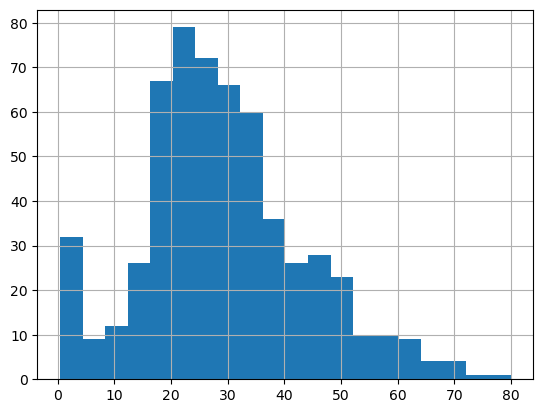

In [99]:
X_train.age.hist(bins=20)

In [105]:
df=pd.concat([X_train,y_train],axis=1).groupby("sex").survived.mean()

<AxesSubplot:xlabel='sex'>

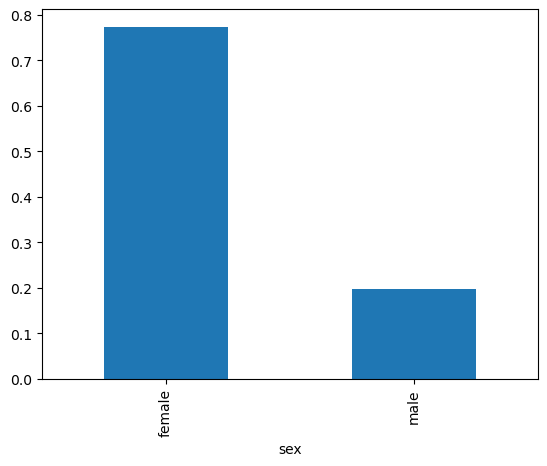

In [108]:
df.plot(kind="bar")

In [2]:
## Neural Network

fmnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
train_images[0,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
train_labels[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [12]:
class_names=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle_Boot"]

In [14]:
##Data Preprocessing 
#Data Scaling
train_images=train_images/255
test_images=test_images/255

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation="relu"),#hidden layer
    keras.layers.Dense(10,activation="softmax")#output layer
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5005 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3778 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3366 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3127 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2944 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2791 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2699 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2558 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2483 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [19]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8806


In [24]:
predictions=model.predict(test_images)

313/313 [==============================] - 0s 925us/step


9


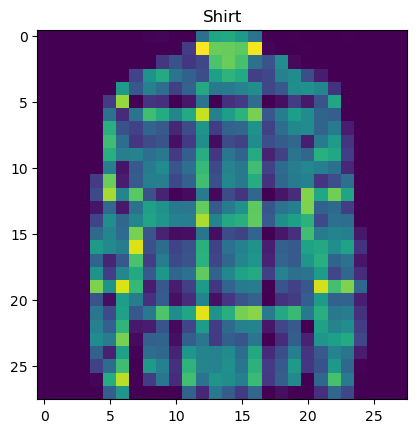

In [40]:
index=np.argmax(predictions[7])
plt.figure()
plt.title(class_names[index])
plt.imshow(test_images[7])
plt.show()